S11 T01: Agrupa els diferents vols
Pendent: Rebre una qualificació
Descripció

Anem a practicar i a familiaritzar-nos amb algoritmes de clustering.
Nivell 1



- Exercici 1

Agrupa els diferents vols utilitzant l'algorisme de K-means.



In [42]:
import pandas as pd
from collections import Counter
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from kneed import DataGenerator, KneeLocator
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [43]:
file="DelayedFlights.csv"
df = pd.read_csv(file,low_memory=False,index_col=0)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [44]:
df=df.sample(frac=0.01, random_state=1)

In [45]:
df_num=df._get_numeric_data()
df_num.fillna(0, inplace=True)


In [46]:
df_obj=df.select_dtypes(["object_"])
df_obj.head()

,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
6516830,WN,N700GS,CLE,BWI,N
3577214,CO,N54241,EWR,LAS,N
148177,YV,N27185,ORD,BNA,N
1035260,9E,87189E,ORF,DTW,N
4599044,FL,N267AT,ATL,DEN,N


In [47]:
le = LabelEncoder()
for feat in df_obj.columns:
    df_obj[feat] = LabelEncoder().fit_transform(df_obj[feat].astype(str))
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19368 entries, 6516830 to 4958559
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   UniqueCarrier     19368 non-null  int64
 1   TailNum           19368 non-null  int64
 2   Origin            19368 non-null  int64
 3   Dest              19368 non-null  int64
 4   CancellationCode  19368 non-null  int64
dtypes: int64(5)
memory usage: 907.9 KB


In [48]:
df_clean=df_num.copy()
df_clean=df_clean.join(df_obj)
df_clean.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
6516830,2008,12,19,5,1332.0,1320,1436.0,1430,3858,64.0,...,0.0,0.0,0.0,0.0,0.0,17,3291,54,40,3
3577214,2008,6,17,2,1731.0,1720,2013.0,1955,268,342.0,...,11.0,0.0,7.0,0.0,0.0,5,2311,89,136,3
148177,2008,1,27,7,735.0,645,918.0,815,7343,103.0,...,63.0,0.0,0.0,0.0,0.0,19,844,193,27,3
1035260,2008,2,13,3,1333.0,1230,1515.0,1438,2927,102.0,...,0.0,0.0,0.0,0.0,37.0,0,68,194,76,3
4599044,2008,8,12,2,1359.0,1346,1517.0,1447,301,198.0,...,13.0,0.0,17.0,0.0,0.0,9,833,16,70,3


In [49]:
df_clean.drop_duplicates(inplace=True)
df_clean.reset_index(inplace=True, drop=True)
df_clean.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
UniqueCarrier        0
TailNum              0
Origin               0
Dest                 0
CancellationCode     0
dtype: int64

In [50]:
scaler = RobustScaler()
np_std = scaler.fit_transform(df_clean)
df_std = pd.DataFrame(np_std, columns = df_clean.columns )
df_std.head()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
0,0.0,1.000000,0.200000,0.25,-0.304721,-0.279412,-0.389972,-0.404070,0.834971,-0.604651,...,0.000000,0.0,0.000000,0.0,0.000000,0.363636,0.387952,-0.733333,-0.803279,0.0
1,0.0,0.000000,0.066667,-0.50,0.266094,0.308824,0.413649,0.359012,-0.447401,2.627907,...,1.222222,0.0,1.166667,0.0,0.000000,-0.727273,-0.027787,-0.441667,-0.016393,0.0
2,0.0,-0.833333,0.733333,0.75,-1.158798,-1.272059,-1.111421,-1.297965,2.079836,-0.151163,...,7.000000,0.0,0.000000,0.0,0.000000,0.545455,-0.650122,0.425000,-0.909836,0.0
3,0.0,-0.666667,-0.200000,-0.25,-0.303290,-0.411765,-0.279944,-0.392442,0.502411,-0.162791,...,0.000000,0.0,0.000000,0.0,1.947368,-1.181818,-0.979319,0.433333,-0.508197,0.0
4,0.0,0.333333,-0.266667,-0.50,-0.266094,-0.241176,-0.277159,-0.379360,-0.435614,0.953488,...,1.444444,0.0,2.833333,0.0,0.000000,-0.363636,-0.654788,-1.050000,-0.557377,0.0


In [51]:

def KMeans_func(df):
    kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
    # A list holds the SSE values for each k
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(df)
        sse.append(kmeans.inertia_)
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 11), sse)
    plt.xticks(range(1, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()
    return sse



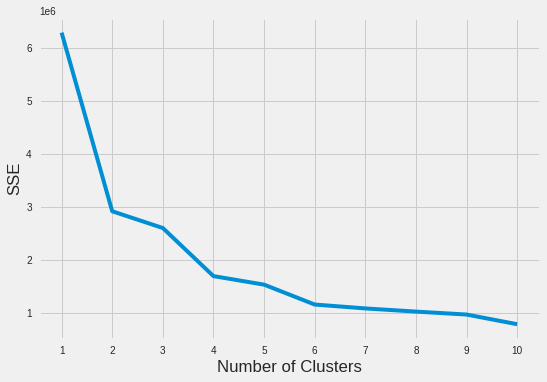

4

In [52]:

sse=KMeans_func(df_std)
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

Nivell 2



- Exercici 2

Agrupa els diferents vols utilitzant l'algorisme de clustering jeràrquic.



In [53]:
pca = PCA(whiten = True)
pca.fit(df_std)
df_pca = pd.DataFrame(pca.transform(df_std))
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.144541,-0.378122,-0.386532,-0.407491,-0.057570,-0.973970,0.470587,-0.280159,0.300636,0.725079,...,-0.020746,0.046831,-0.084785,0.895281,-0.126668,-0.080269,-0.105525,-0.014388,-0.032350,-0.070444
1,-0.144158,-0.092112,-0.077658,-0.574605,-0.009323,2.740559,-0.085320,-0.239698,-1.018415,0.214461,...,-1.110304,-0.051782,1.361534,-0.753801,-0.999706,0.163076,0.915234,0.143339,0.234390,0.021934
2,-0.144367,-0.285260,1.477864,-0.594648,-0.009941,-0.602138,-0.829568,1.425389,2.549662,2.040070,...,0.514015,-0.115655,-0.497461,0.050659,0.539938,-0.016004,-0.359693,-0.218362,-0.079229,-0.012453
3,-0.142227,-0.316346,-0.296911,0.614733,-0.041840,-0.222717,0.206397,-0.141014,0.571431,-0.342577,...,1.249986,-0.125327,1.024521,-1.072099,-0.236947,-0.039790,-0.855024,-0.044733,-0.183538,0.037646
4,-0.143218,0.211216,-0.017199,-0.588507,-0.028525,0.725114,-0.316356,-0.596013,0.041215,-0.905291,...,-1.714642,-0.092339,-0.099141,0.116793,-0.102603,0.041117,1.046269,0.199386,0.253255,-0.015538


In [54]:
def explained_variance(pca):
    count=0
    sum_evr=0
    for percent in pca.explained_variance_ratio_ * 100:
        count+=1
        sum_evr+=percent
        print(f"explained Varinace by PCA{count}: {percent:.2f}% acum {sum_evr:.2f}%")

In [55]:
explained_variance(pca)

explained Varinace by PCA1: 81.70% acum 81.70%
explained Varinace by PCA2: 7.52% acum 89.22%
explained Varinace by PCA3: 4.62% acum 93.84%
explained Varinace by PCA4: 1.49% acum 95.33%
explained Varinace by PCA5: 1.40% acum 96.73%
explained Varinace by PCA6: 0.94% acum 97.66%
explained Varinace by PCA7: 0.51% acum 98.17%
explained Varinace by PCA8: 0.42% acum 98.60%
explained Varinace by PCA9: 0.39% acum 98.99%
explained Varinace by PCA10: 0.13% acum 99.12%
explained Varinace by PCA11: 0.12% acum 99.24%
explained Varinace by PCA12: 0.11% acum 99.35%
explained Varinace by PCA13: 0.11% acum 99.46%
explained Varinace by PCA14: 0.11% acum 99.56%
explained Varinace by PCA15: 0.10% acum 99.66%
explained Varinace by PCA16: 0.09% acum 99.76%
explained Varinace by PCA17: 0.08% acum 99.83%
explained Varinace by PCA18: 0.07% acum 99.91%
explained Varinace by PCA19: 0.04% acum 99.95%
explained Varinace by PCA20: 0.03% acum 99.97%
explained Varinace by PCA21: 0.01% acum 99.99%
explained Varinace by

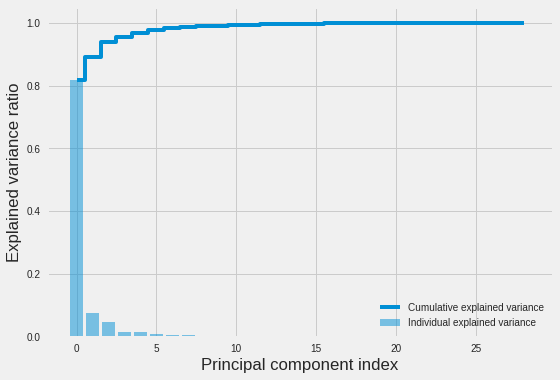

In [56]:
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_,)
plt.bar(range(0,len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [57]:
pca = PCA(.95)
pca_X_principal= pca.fit_transform(df_std)
X_principal = pd.DataFrame(pca_X_principal)
X_principal.head()

,0,1,2,3
0,-2.355515,-1.869262,-1.497564,-0.896965
1,-2.349265,-0.455358,-0.300877,-1.264814
2,-2.352676,-1.410196,5.725778,-1.308932
3,-2.317799,-1.563870,-1.150339,1.353142
4,-2.333948,1.044153,-0.066635,-1.295414


In [58]:
X_principal.columns = [f'P{i}' for i in range(pca.n_components_)]
X_principal.head()

,P0,P1,P2,P3
0,-2.355515,-1.869262,-1.497564,-0.896965
1,-2.349265,-0.455358,-0.300877,-1.264814
2,-2.352676,-1.410196,5.725778,-1.308932
3,-2.317799,-1.563870,-1.150339,1.353142
4,-2.333948,1.044153,-0.066635,-1.295414


In [59]:
X_principal.shape

(19368, 4)

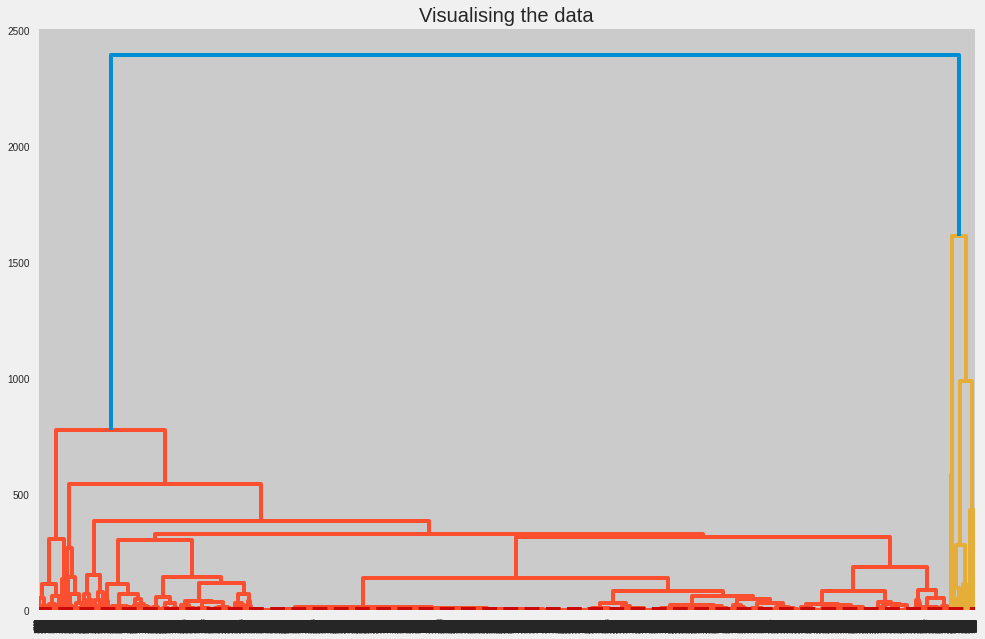

In [60]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(15, 10))
plt.title('Visualising the data')
dendrogram = shc.dendrogram(shc.linkage(X_principal, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')


In [61]:
k4_means = KMeans(init = "k-means++", 
                 n_clusters = 3,
                 n_init = 12, 
                 random_state= 130).fit(X_principal)

In [62]:
df_labels = pd.concat([df_std, pd.DataFrame({'kmeans_labels':k4_means.labels_})], axis=1)
df_labels.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier,TailNum,Origin,Dest,CancellationCode,kmeans_labels
0,0.0,1.000000,0.200000,0.25,-0.304721,-0.279412,-0.389972,-0.404070,0.834971,-0.604651,...,0.0,0.000000,0.0,0.000000,0.363636,0.387952,-0.733333,-0.803279,0.0,0
1,0.0,0.000000,0.066667,-0.50,0.266094,0.308824,0.413649,0.359012,-0.447401,2.627907,...,0.0,1.166667,0.0,0.000000,-0.727273,-0.027787,-0.441667,-0.016393,0.0,0
2,0.0,-0.833333,0.733333,0.75,-1.158798,-1.272059,-1.111421,-1.297965,2.079836,-0.151163,...,0.0,0.000000,0.0,0.000000,0.545455,-0.650122,0.425000,-0.909836,0.0,0
3,0.0,-0.666667,-0.200000,-0.25,-0.303290,-0.411765,-0.279944,-0.392442,0.502411,-0.162791,...,0.0,0.000000,0.0,1.947368,-1.181818,-0.979319,0.433333,-0.508197,0.0,0
4,0.0,0.333333,-0.266667,-0.50,-0.266094,-0.241176,-0.277159,-0.379360,-0.435614,0.953488,...,0.0,2.833333,0.0,0.000000,-0.363636,-0.654788,-1.050000,-0.557377,0.0,0


In [63]:
agglomerative = AgglomerativeClustering(n_clusters= 4, affinity='euclidean', linkage='ward')
agglomerative.fit(X_principal)
agglomerative.labels_


array([0, 0, 0, ..., 0, 0, 0])

In [64]:
df["Agglomerative_labels"] = agglomerative.labels_
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Agglomerative_labels
6516830,2008,12,19,5,1332.0,1320,1436.0,1430,WN,3858,...,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0,0
3577214,2008,6,17,2,1731.0,1720,2013.0,1955,CO,268,...,18.0,0,N,0,11.0,0.0,7.0,0.0,0.0,0
148177,2008,1,27,7,735.0,645,918.0,815,YV,7343,...,45.0,0,N,0,63.0,0.0,0.0,0.0,0.0,0
1035260,2008,2,13,3,1333.0,1230,1515.0,1438,9E,2927,...,15.0,0,N,0,0.0,0.0,0.0,0.0,37.0,0
4599044,2008,8,12,2,1359.0,1346,1517.0,1447,FL,301,...,15.0,0,N,0,13.0,0.0,17.0,0.0,0.0,0


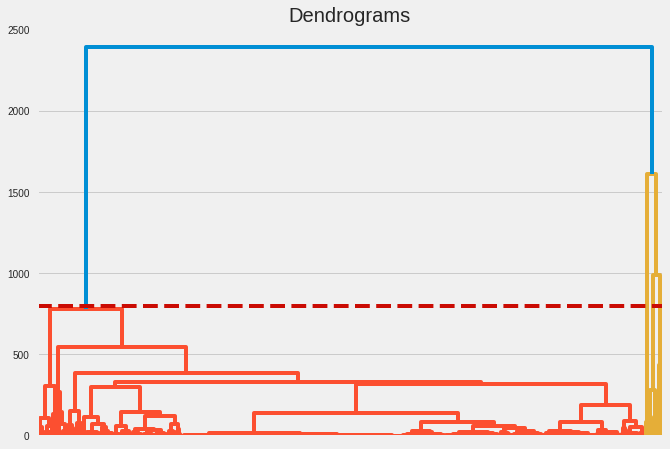

In [65]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_principal, method='ward'), no_labels=True)
plt.axhline(y=800, color='r', linestyle='--')

Nivell 3


- Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [66]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_std)
    score = silhouette_score(df_std, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients




[0.9194170044646957,
 0.6397865059748068,
 0.6522240861441045,
 0.5527508980240048,
 0.5737786987113845,
 0.5085669386486943,
 0.45749387962900795,
 0.3725996915331416,
 0.23350554704159568]

In [67]:
kmeans.labels_


array([1, 9, 1, ..., 1, 1, 4], dtype=int32)

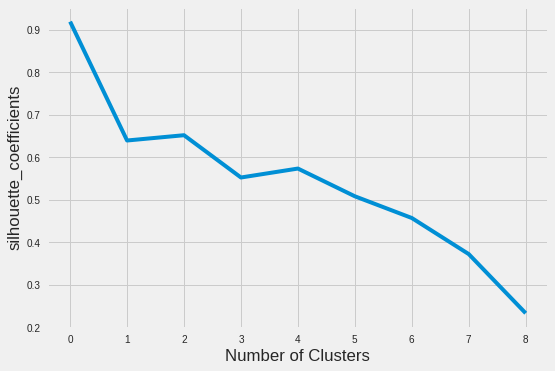

In [68]:
plt.style.use("fivethirtyeight")
plt.plot(range(0, 9), silhouette_coefficients)
plt.xticks(range(0, 9))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_coefficients")
plt.show()